This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [11]:
#mnist data 갖고와서 train과 test로 나누기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
#train_images의 차원확인
train_images.shape
#train_labels의 length 확인
len(train_labels)

60000

In [13]:
#타입 확인 - 정수
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**The network architecture**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
#모델구조 정의
#Sequential 모델 입력-1층-2층-출력
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")  #숫자 10개니까 10개
])
#relu 음수면0, 양수면 그대로 / softmax 각 숫자에 해당할 값을 확률로 넣

**The compilation step**

In [15]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",   #레이블이 정수일때
              metrics=["accuracy"])

**Preparing the image data**

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images = train_images.reshape((60000, 28 * 28))   #60000, 784 -> 60000, 28*28
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)   #60000개의 데이터를 128개씩 나눠서 학습 / <-이걸 5번 반복

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.6518e-04
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5777e-04
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.4950e-04
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3971e-04
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3657e-04


**Using the model to make predictions**

In [23]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]
#predictions에는 학습된 이미지 10개가 들어있음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


array([9.7106286e-13, 1.9273658e-16, 2.8500217e-12, 4.0935615e-09,
       1.9545364e-18, 7.4026444e-14, 1.9577527e-18, 1.0000000e+00,
       7.9953019e-14, 2.6628906e-11], dtype=float32)

In [24]:
predictions[0]

array([9.7106286e-13, 1.9273658e-16, 2.8500217e-12, 4.0935615e-09,
       1.9545364e-18, 7.4026444e-14, 1.9577527e-18, 1.0000000e+00,
       7.9953019e-14, 2.6628906e-11], dtype=float32)

In [25]:
predictions[0].argmax()   #첫번째 handwrite 이미지의 확률 중 가장 큰 순서

np.int64(7)

In [26]:
predictions[0][7]

np.float32(1.0)

In [27]:
test_labels[0]

np.uint8(7)

**Evaluating the model on new data**

In [28]:
#모델 평가 / test_loss,acc에 test_images(예측값)와 test_labels(참값)의 차이를 넣음
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss : {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0872
test_acc: 0.9847000241279602
test_loss : 0.07110847532749176


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [29]:
#0차원 - 스칼라 / 1차원 - 벡터(스칼라 이어붙임) / 2차원 - 매트릭스 (스칼라 위아래로 이어붙임)
import numpy as np
x = np.array(12)
x
#차원 확인x.ndim

array(12)

In [30]:
x.ndim

0

### Vectors (rank-1 tensors)

In [34]:
y = np.array([12, 3, 6, 14, 7])
y

array([12,  3,  6, 14,  7])

In [35]:
y.ndim

1

### Matrices (rank-2 tensors)

In [33]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

### Key attributes

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_images.ndim

3

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

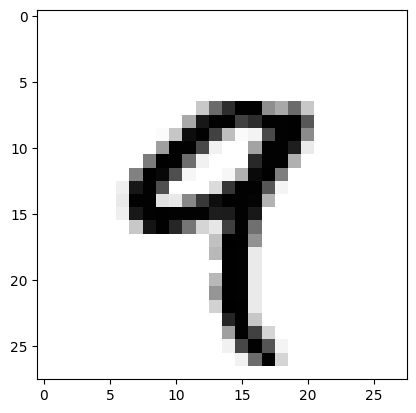

In [5]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
train_labels[4]

np.uint8(9)

### Manipulating tensors in NumPy

In [7]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [8]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [9]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [13]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [14]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [15]:
batch = train_images[:128]

In [16]:
batch = train_images[128:256]

In [17]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [21]:
def naive_relu(x):
    assert len(x.shape) == 2    #x의 차원이 2가 아니면 false발생시킴 shape는 (2,2)등의 2차원이여야함
    x = x.copy()                #복사본만들어서 작업
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) #모든 원소를 0보다 작으면 0으로 바꿈
    return x

In [25]:
import numpy as np
a = np.array([[1, -2, 3],
              [-4, 5, -6]])
print(naive_relu(a))

[[1 0 3]
 [0 5 0]]


In [26]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [28]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [30]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.57 s


### Broadcasting

In [34]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
y

array([0.25901972, 0.97861954, 0.37903112, 0.02587317, 0.5617764 ,
       0.0105405 , 0.5090949 , 0.89205999, 0.93221827, 0.69752324])

In [36]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)    #X와 크기를 맞춰줌 X의 행이 32이기 때문에 32번 복제

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [45]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)



(64, 3, 32, 10)

### Tensor product

In [46]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [47]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [48]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [50]:
import tensorflow as tf
x = tf.Variable(0.)   #1차원
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)   #y를 x로 미분

In [51]:
x = tf.Variable(tf.random.uniform((2, 2)))    #2차원
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [52]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [54]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [57]:
import keras as keras
from keras import Sequential
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [58]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [59]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8720 - loss: 0.4391
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1182
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0722
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0509
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0385


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [62]:
import tensorflow as tf

#순전파 함수 정의 input output activation 입력받아서 wx+b 만드는거 w는 0~1사잇값
#b는 0, call에서 wx+b 가중치도 정의

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [63]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [64]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [65]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step




In [67]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)  #loss를 weight로 미분
    update_weights(gradients, model.weights)
    return average_loss

In [70]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [71]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [72]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [73]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 3.67
loss at batch 100: 2.24
loss at batch 200: 2.19
loss at batch 300: 2.07
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.87
loss at batch 200: 1.80
loss at batch 300: 1.69
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.57
loss at batch 200: 1.47
loss at batch 300: 1.41
loss at batch 400: 1.49
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.33
loss at batch 200: 1.21
loss at batch 300: 1.20
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.11
loss at batch 100: 1.15
loss at batch 200: 1.02
loss at batch 300: 1.04
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [74]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary